# eBay Cleaned data set

#### importing the data from computer


In [1005]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

Loading the two csv files and merging them to create one dataframe called ebay_data

In [1006]:

file_path = '/Users/anani/Data Management/Ebay Homework/EbayPcLaptopDataUnclean.csv'
file_path2 = "/Users/anani/Data Management/Ebay Homework/EbayPcLaptopPriceData.csv"

ebay_data = pd.read_csv(file_path)
merging_data= pd.read_csv(file_path2)

In [1007]:
ebay_data=pd.DataFrame(ebay_data)
merging_data =pd.DataFrame(merging_data)

# Removing the 'Item Number' column from the merging_data DataFrame
merging_data = merging_data.drop(columns=['Item Number'])

# Concatenate the two DataFrames
ebay_data = pd.concat([ebay_data, merging_data], axis=1)

In [1008]:
# to examine the data
ebay_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6676 entries, 0 to 6675
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Item Number                    6676 non-null   int64  
 1   Brand                          4098 non-null   object 
 2   Rating                         291 non-null    object 
 3   Ratings Count                  291 non-null    float64
 4   Processor                      3909 non-null   object 
 5   Screen Size                    3963 non-null   object 
 6   Manufacturer Color             190 non-null    object 
 7   Color                          2195 non-null   object 
 8   Ram Size                       2173 non-null   object 
 9   SSD Capacity                   2844 non-null   object 
 10  GPU                            3122 non-null   object 
 11  Processor Speed                2727 non-null   object 
 12  Type                           3349 non-null   o

Initial review of the dataset and its column names, it was determined that most columns are not suitable for statistical computations, such as mean or median, with the exception of the 'Price' column. As a result, the majority of the columns will be treated as qualitative data, with the analysis primarily focusing on the frequency of occurrence of specific categories within the dataset.

To address the rows first, as I observed that many rows towards the bottom of the ebay_data dataset contained a significant number of missing values, rendering them uninformative and unsuitable for analysis.

In [1009]:
#calculating missing data by row 
missing_data_col = ebay_data.isna().sum(axis=1) # calcuating the missing data per row
# calculating missing data percentage 
missing_data_percentage=missing_data_col/(ebay_data.shape[1])*100 
missing_data_percentage.round(2)
missing_data_percentage

0       16.666667
1       25.000000
2       12.500000
3       25.000000
4       20.833333
          ...    
6671    87.500000
6672    79.166667
6673    87.500000
6674    79.166667
6675    87.500000
Length: 6676, dtype: float64

Following a thorough review, all rows with more than 74% missing data were removed from the dataset 

In [1010]:
# Drop rows where missing data percentage is larger than 74%
ebay_data_cleaned = ebay_data[missing_data_percentage <= 74]

# Check how many rows were dropped
rows_dropped = ebay_data.shape[0] - ebay_data_cleaned.shape[0]
print(f"Number of rows dropped: {rows_dropped}")

Number of rows dropped: 3307


After removing values by rows it was time to deal with missing data by column

In [1011]:
missing_data_col = ebay_data_cleaned.isna().sum() # calcuating the missing data per column
# calculating missing data percentage 
missing_data_percentage=missing_data_col/(ebay_data.shape[0])*100 
missing_data_percentage.round(2)
missing_data_percentage



Item Number                       0.000000
Brand                             0.000000
Rating                           46.120431
Ratings Count                    46.120431
Processor                         0.733972
Screen Size                       0.179748
Manufacturer Color               47.618334
Color                            22.183942
Ram Size                         17.914919
SSD Capacity                      7.863990
GPU                              16.461953
Processor Speed                   9.616537
Type                              4.823247
Release Year                     38.271420
Maximum Resolution               12.672259
Model                             2.531456
OS                                3.984422
Hard Drive Capacity              14.904134
Country Region Of Manufacture    47.393649
Storage Type                     13.870581
Features                         12.162972
Condition                         6.351108
Seller Note                      30.886759
Price      

In [1012]:
median=missing_data_percentage.median()
median

np.float64(12.417615338526062)

Although our median is 12 we this is too low I decided to us 21 because all the relevant columns for analyzing consumer  preference is are below 21%

In [1013]:

columns_to_keep = missing_data_col[missing_data_percentage <= 21].index
ebay_data_cleaned = ebay_data_cleaned[columns_to_keep]

ebay_data_cleaned

,Item Number,Brand,Processor,Screen Size,Ram Size,SSD Capacity,GPU,Processor Speed,Type,Maximum Resolution,Model,OS,Hard Drive Capacity,Storage Type,Features,Condition,Price
0,85264981001,CHUWI,Quad Core,14 in,8 GB,"1 Used, 1 support Max 1TB M.2 Extend",Intel Iris Plus Graphics 655,Max up to 3.80 GHz,Notebook/Laptop,2160 x 1440,CoreBook X,Windows 11 Home,512 GB SSD,SSD (Solid State Drive),"Backlit Keyboard, Built-in Microphone, Built...","New: A brand-new, unused, unopened, undamaged ...",$303.68
1,85264981002,Dell,Intel Core i7 8th Gen.,14 in,NaN,NaN,Intel UHD Graphics 620,4.20 GHz (1.90 GHz Base Frequency),Notebook/Laptop,1920 x 1080,Dell Latitude 7490,Windows 11 Pro,2 TB,SSD (Solid State Drive),"Backlit Keyboard, Bluetooth, Built-in Micropho...",Very Good - RefurbishedThe item shows minimal ...,$399.99 to $634.99
2,85264981003,Dell,Intel Core i5-6300U,14 in,16 GB,500 GB,Intel HD Graphics,2.40 GHz,Notebook/Laptop,1920 x 1080,Dell Latitude E5470,Windows 10 Pro,500 GB,SSD (Solid State Drive),"10/100 LAN Card, Backlit Keyboard, Bluetooth, ...",UsedAn item that has been used previously. The...,$175.00
3,85264981004,HP,Intel Celeron N,11.6 in,4 GB,NaN,Intel HD Graphics 500,2.40 GHz,Notebook/Laptop,1366 x 768,HP Chromebook 11 G6,Chrome OS,16 GB,eMMC,"Bluetooth, Built-in Microphone, Built-in Webca...",Good - RefurbishedThe item shows moderate wear...,$84.99
4,85264981005,Dell,Intel Core i5 6th Gen.,"Minimum 12.5""",8 GB,256 GB,Integrated,Minimum 1.40 GHz,Notebook/Laptop,1366 x 768,Various Models,Windows 10,NO HDD,SSD (Solid State Drive),"10/100 LAN Card, Built-in Microphone, Built-in...",Good - RefurbishedThe item shows moderate wear...,$101.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6650,85264987595,Dell,Intel Core i5 3rd generation,"14""",NaN,120GB,Intel HD Graphics 4000,3.10 GHz,Notebook/Laptop,HD,E5430,Windows 11 Pro,NO,SSD,"10/100 LAN Card, Wi-Fi",Seller refurbished: The item has been restored...,$270.15
6651,85264987596,Dell,Intel Core i5 4th generation,"14""",NaN,960GB,Intel HD Graphics 4400,2.60 GHz,Notebook/Laptop,HD,E5440,Windows 10 Pros,NO,NaN,"10/100 LAN Card, Wi-Fi, SD Card Reader",Used: An item that has been used previously. T...,$429.10
6657,85264987602,Dell,Intel Core i5 6th generation,"12, 5""",NaN,120GB,Intel HD Graphics 520,2.80 GHz,Notebook/Laptop,Full HD,E7270,Windows 11 Pro,NO,NaN,"Touchscreen, 10/100 LAN Card, Bluetooth, Ba...",Used: An item that has been used previously. T...,$424.83
6658,85264987603,Dell,Intel Core i5 4th generation,"14""",NaN,960GB,Intel HD Graphics 4400,2.60 GHz,Notebook/Laptop,HD,E5440,Windows 11 Pro,NO,NaN,"10/100 LAN Card, Wi-Fi, SD Card Reader",Used: An item that has been used previously. T...,$432.95


In [1014]:
# renumbering the indices
# Reset the index of the cleaned DataFrame and drop the old index
ebay_data_cleaned = ebay_data_cleaned.reset_index(drop=True)
ebay_data_cleaned

,Item Number,Brand,Processor,Screen Size,Ram Size,SSD Capacity,GPU,Processor Speed,Type,Maximum Resolution,Model,OS,Hard Drive Capacity,Storage Type,Features,Condition,Price
0,85264981001,CHUWI,Quad Core,14 in,8 GB,"1 Used, 1 support Max 1TB M.2 Extend",Intel Iris Plus Graphics 655,Max up to 3.80 GHz,Notebook/Laptop,2160 x 1440,CoreBook X,Windows 11 Home,512 GB SSD,SSD (Solid State Drive),"Backlit Keyboard, Built-in Microphone, Built...","New: A brand-new, unused, unopened, undamaged ...",$303.68
1,85264981002,Dell,Intel Core i7 8th Gen.,14 in,NaN,NaN,Intel UHD Graphics 620,4.20 GHz (1.90 GHz Base Frequency),Notebook/Laptop,1920 x 1080,Dell Latitude 7490,Windows 11 Pro,2 TB,SSD (Solid State Drive),"Backlit Keyboard, Bluetooth, Built-in Micropho...",Very Good - RefurbishedThe item shows minimal ...,$399.99 to $634.99
2,85264981003,Dell,Intel Core i5-6300U,14 in,16 GB,500 GB,Intel HD Graphics,2.40 GHz,Notebook/Laptop,1920 x 1080,Dell Latitude E5470,Windows 10 Pro,500 GB,SSD (Solid State Drive),"10/100 LAN Card, Backlit Keyboard, Bluetooth, ...",UsedAn item that has been used previously. The...,$175.00
3,85264981004,HP,Intel Celeron N,11.6 in,4 GB,NaN,Intel HD Graphics 500,2.40 GHz,Notebook/Laptop,1366 x 768,HP Chromebook 11 G6,Chrome OS,16 GB,eMMC,"Bluetooth, Built-in Microphone, Built-in Webca...",Good - RefurbishedThe item shows moderate wear...,$84.99
4,85264981005,Dell,Intel Core i5 6th Gen.,"Minimum 12.5""",8 GB,256 GB,Integrated,Minimum 1.40 GHz,Notebook/Laptop,1366 x 768,Various Models,Windows 10,NO HDD,SSD (Solid State Drive),"10/100 LAN Card, Built-in Microphone, Built-in...",Good - RefurbishedThe item shows moderate wear...,$101.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3364,85264987595,Dell,Intel Core i5 3rd generation,"14""",NaN,120GB,Intel HD Graphics 4000,3.10 GHz,Notebook/Laptop,HD,E5430,Windows 11 Pro,NO,SSD,"10/100 LAN Card, Wi-Fi",Seller refurbished: The item has been restored...,$270.15
3365,85264987596,Dell,Intel Core i5 4th generation,"14""",NaN,960GB,Intel HD Graphics 4400,2.60 GHz,Notebook/Laptop,HD,E5440,Windows 10 Pros,NO,NaN,"10/100 LAN Card, Wi-Fi, SD Card Reader",Used: An item that has been used previously. T...,$429.10
3366,85264987602,Dell,Intel Core i5 6th generation,"12, 5""",NaN,120GB,Intel HD Graphics 520,2.80 GHz,Notebook/Laptop,Full HD,E7270,Windows 11 Pro,NO,NaN,"Touchscreen, 10/100 LAN Card, Bluetooth, Ba...",Used: An item that has been used previously. T...,$424.83
3367,85264987603,Dell,Intel Core i5 4th generation,"14""",NaN,960GB,Intel HD Graphics 4400,2.60 GHz,Notebook/Laptop,HD,E5440,Windows 11 Pro,NO,NaN,"10/100 LAN Card, Wi-Fi, SD Card Reader",Used: An item that has been used previously. T...,$432.95


At this stage, each column was handled individually, addressing unique values as needed. However, due to the high variability in certain columns, it was deemed inefficient to attempt to 'fix' those with extensive inconsistencies. eBay is primarily interested in understanding consumer preferences and the factors that influence purchasing decisions. After consulting with classmates and utilizing ChatGPT to ask, 'What is the most important factor when buying a computer?', the most common responses were: 'Hard Drive Capacity', 'RAM Size', 'Maximum Resolution', 'Condition', 'Storage Type', 'Brand', and 'Screen Size'. These factors were prioritized in the analysis.


In [1015]:
missing_data_col = ebay_data_cleaned.isna().sum()
missing_data_percentage=missing_data_col/(ebay_data.shape[0])*100 
missing_data_percentage.round(2)
missing_data_percentage


Item Number             0.000000
Brand                   0.000000
Processor               0.733972
Screen Size             0.179748
Ram Size               17.914919
SSD Capacity            7.863990
GPU                    16.461953
Processor Speed         9.616537
Type                    4.823247
Maximum Resolution     12.672259
Model                   2.531456
OS                      3.984422
Hard Drive Capacity    14.904134
Storage Type           13.870581
Features               12.162972
Condition               6.351108
Price                   0.000000
dtype: float64

### MIssing values in Processor

In [1016]:
# Due to the low percentage of missing data I am going to delete the rows that have NaN in Processor colomn

ebay_data_cleaned = ebay_data_cleaned.dropna(subset=['Processor','Screen Size','SSD Capacity','Processor Speed',
                                                     'Type','Model','OS'])

In [1017]:
missing_data_col = ebay_data_cleaned.isna().sum()
missing_data_percentage=missing_data_col/(ebay_data.shape[0])*100 
missing_data_percentage.round(2)
missing_data_percentage

Item Number             0.000000
Brand                   0.000000
Processor               0.000000
Screen Size             0.000000
Ram Size               11.324146
SSD Capacity            0.000000
GPU                     6.111444
Processor Speed         0.000000
Type                    0.000000
Maximum Resolution      4.418814
Model                   0.000000
OS                      0.000000
Hard Drive Capacity     8.013781
Storage Type            6.875374
Features                3.115638
Condition               4.448772
Price                   0.000000
dtype: float64

### Missing values in Ram Size

 I replaced all NaN values with zeros, as RAM size is categorized as qualitative discrete data. Given this classification, there is no need to perform basic numerical statistics such as average, median, or standard deviation on RAM size. Instead, the focus is on understanding the frequency at which different RAM sizes are being purchased, which can be effectively analyzed through frequency distribution.

In [1018]:
unique_values= ebay_data_cleaned['Ram Size'].unique()
unique_values

array(['8 GB', '16 GB', '4 GB', '4 MB', 'Up to 32GB', nan, '12 GB',
       '20 GB', '32 GB', '3 GB', '16GB', '8GB', 'Up to 64GB', '24 GB',
       '16GB DDR4 RAM', '64 GB', '8GB / 16 GB OR 32GB SELECT FROM ABOVE',
       '8 GB RAM', '2 GB', '8GB,  16GB,  32GB,  64GB', '4GB', '512 GB',
       '20gb', 'Up to 36 GB', '16 GB RAM', 'up to 32GBGB DDR4', '4gb',
       '12GB', '8GB DDR4',
       '8 GB DDR4 Installed---Can upgrade o 32GB DDR4', '8', '32GB',
       '64 MB', '12gb', '16gb', '6 GB', '40 GB', 'Up to 40GB', '128 GB',
       'Up to 32 GB', '2GB', '256 GB', '4GB - 16 GB', '24GB',
       '16 GB DDR4', '4 GB- 8 GB'], dtype=object)

In [1019]:
ebay_data_cleaned['Ram Size'].replace(to_replace=['Up to 32GB','8GB / 16 GB OR 32GB]', 'Up to 32GB', 'Up to 32GB',
                                              'up to 32GBGB DDR4',   '8 GB DDR4 Installed---Can upgrade o 32GB DDR4',
                                              '32GB',  'Up to 32 GB', 'Up to 32 GB'], 
                                              value = '32 GB', inplace= True)

ebay_data_cleaned['Ram Size'].replace(to_replace=['16GB','16GB DDR4 RAM', '8GB / 16 GB OR 32GB SELECT FROM ABOVE',
                                                  '16 GB RAM','16gb', '6 GB','4GB - 16 GB','16 GB DDR4'],
                                                    value = '16 GB', inplace=True)

ebay_data_cleaned['Ram Size'].replace(to_replace=[ '8GB','8 GB RAM','8GB,  16GB,  32GB,  64GB', 
                                                  '8GB DDR4','4 GB- 8 GB' ], 
                                                  value = '8 GB', inplace=True)

ebay_data_cleaned['Ram Size'].replace(to_replace=[ '4 MB',  '4GB', '40 GB','Up to 40GB'], 
                                                  value ='4 GB', inplace=True)


ebay_data_cleaned['Ram Size'].replace(to_replace=[ 'Up to 64GB','64 MB'], 
                                                  value ='64 GB', inplace=True)

ebay_data_cleaned['Ram Size'].replace(to_replace=[ 'Up to 36 GB'], 
                                                  value ='36 GB', inplace=True)

ebay_data_cleaned['Ram Size'].replace(to_replace=[ '12GB','2GB'], 
                                                  value ='12 GB', inplace=True)

ebay_data_cleaned['Ram Size'].replace(to_replace=[  '24GB'], 
                                                  value ='24 GB', inplace=True)


C:\Users\anani\AppData\Local\Temp\ipykernel_15056\3380716384.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ebay_data_cleaned['Ram Size'].replace(to_replace=['Up to 32GB','8GB / 16 GB OR 32GB]', 'Up to 32GB', 'Up to 32GB',
C:\Users\anani\AppData\Local\Temp\ipykernel_15056\3380716384.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ebay

To avoid removing rows with more than 74% missing data, I filled all NaN values with zeros and removed entries that lacked 'GB' or 'MB' in the RAM size field.

In [1020]:
# Replacing all NaN or empty rows in 'Ram Size' with 0
ebay_data_cleaned['Ram Size'] = ebay_data_cleaned['Ram Size'].fillna(0)

# Removing rows where 'Ram Size' does not contain 'GB' or 'MB'
ebay_data_cleaned = ebay_data_cleaned[ebay_data_cleaned['Ram Size'].str.contains('GB|MB', na=False)]

C:\Users\anani\AppData\Local\Temp\ipykernel_15056\3790991678.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ebay_data_cleaned['Ram Size'] = ebay_data_cleaned['Ram Size'].fillna(0)


Dealing with  Hard Drive Capacity

In [1021]:
# I want to get a list of all the unique values
unique_values= ebay_data_cleaned['Hard Drive Capacity'].unique()
unique_values

array(['512 GB SSD', '500 GB', 'NO HDD', nan, '16 GB', '512 GB', '256 GB',
       '128 GB', 'Up to 2TB', '512GB SSD', '12 GB', '320 GB', 'No HDD',
       '1 TB', '32 GB', 'No', '128GB', '64 GB', 'SSD', '8 GB', '1tb',
       '1TB', '4 GB', '250 GB', '1 GB',
       '120GB 240GB 512GB 1TB SELECT FROM ABOVE', '2 GB', '64gb', '2 TB',
       '128GB,  256GB,  500GB,  1TB,  2TB', '64GB', '1TB SSD',
       'Not Applicable', '0', 'Up to 1 TB', 'SSD ONLY', '120 GB', '0 GB',
       'SEE SSD', '4 TB', 'up to 1 TB', '256 GB SSD', '160 GB',
       '2TB m.2 NvMe SSD', '16 GB SSD', '512GB', '16GB', 'non', 'N/a',
       '240 GB', '800 GB', 'not included', '32GB', '465 GB', 'SSD only',
       '2TB', '1', '512', 'Not Included', 'Up to 2 TB', 'SSD Only',
       '128 GB (gigabyte)', '1tb nvme', '0GB', '250 GB - 1 TB', 'Non',
       '256GB', '24 GB', '.', 'N.A.', "Don't Apply", '62 GB',
       '320 GB- 500 GB', '250 GB- 1 TB'], dtype=object)

Many values in the Hard Drive Capacity column were presented as ranges. I chose the higher end of each range and converted any non-numeric entries to 0.

In [1022]:

ebay_data_cleaned['Hard Drive Capacity'].replace(to_replace=[  '512 GB SSD', '512GB SSD', '512GB',
                                                   '320 GB- 500 GB', '500 GB'], 
                                                  value ='512 GB', inplace=True)

ebay_data_cleaned['Hard Drive Capacity'].replace(to_replace=['NO HDD', 'No HDD', 'No', 'Not Applicable'
                                                 'SSD ONLY','SEE SSD', 'non', 'N/a','not included',
                                                'SSD only', 'Not Included', 'SSD Only', '0GB','Non'
                                                 '.', 'N.A.', "Don't Apply", 'SSD' ,'Not Applicable','SSD ONLY', '0 GB',
                                                 'Non',  '.'], 
                                                  value ='0', inplace=True)
ebay_data_cleaned['Hard Drive Capacity'].replace(to_replace=['Up to 2TB','2 GB','128GB,  256GB,  500GB,  1TB,  2TB',
                                                  '2TB m.2 NvMe SSD','2TB','Up to 2 TB',], 
                                                  value ='2 TB', inplace=True)


ebay_data_cleaned['Hard Drive Capacity'].replace(to_replace=['1tb', '1TB','120GB 240GB 512GB 1TB SELECT FROM ABOVE',
                                                            '1TB SSD', 'Up to 1 TB', 'up to 1 TB', '1', '250 GB - 1 TB',
                                                           '1tb nvme', '250 GB- 1 TB'], 
                                                  value ='1 TB', inplace=True)

ebay_data_cleaned['Hard Drive Capacity'].replace(to_replace=['64gb','4 GB', '62 GB', '64GB',
                                                             ], 
                                                  value ='64 GB', inplace=True)

ebay_data_cleaned['Hard Drive Capacity'].replace(to_replace=['12 GB','1 GB','160 GB','16 GB SSD',
                                                         '16GB'], value ='16 GB', inplace=True)

ebay_data_cleaned['Hard Drive Capacity'].replace(to_replace =['128GB', '120 GB', '128 GB (gigabyte)'], 
                                                 value ='128 GB', inplace=True)

ebay_data_cleaned['Hard Drive Capacity'].replace(to_replace =['32GB', '320 GB'], 
                                                 value ='32 GB', inplace=True)

ebay_data_cleaned['Hard Drive Capacity'].replace(to_replace =[ '256 GB SSD', '256GB','250 GB'], 
                                                 value ='256 GB', inplace=True)

ebay_data_cleaned['Hard Drive Capacity'].replace(to_replace =['240 GB', '256GB','250 GB'], 
                                                 value ='24 GB', inplace=True)

ebay_data_cleaned['Hard Drive Capacity'].replace(to_replace =['800 GB'], 
                                                 value ='8 GB', inplace=True)

ebay_data_cleaned['Hard Drive Capacity'].replace(to_replace =['512'], 
                                                 value ='512 GB', inplace=True)


C:\Users\anani\AppData\Local\Temp\ipykernel_15056\763628729.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ebay_data_cleaned['Hard Drive Capacity'].replace(to_replace=[  '512 GB SSD', '512GB SSD', '512GB',


In [1023]:
unique_values= ebay_data_cleaned['Hard Drive Capacity'].unique()
unique_values

array(['512 GB', '0', nan, '16 GB', '256 GB', '128 GB', '2 TB', '32 GB',
       '1 TB', '64 GB', '8 GB', '4 TB', '24 GB', '465 GB'], dtype=object)

In [1024]:
#  Replacing all NaN or empty rows in 'Hard Drive Capcity' with 0
ebay_data_cleaned['Hard Drive Capacity'] = ebay_data_cleaned['Hard Drive Capacity'].fillna(0)

# Removing rows where 'Hard Drive Capacity' does not contain 'GB' or 'TB'
ebay_data_cleaned = ebay_data_cleaned[ebay_data_cleaned['Hard Drive Capacity'].str.contains('GB|TB', na=False)]

In [1025]:
missing_data_col = ebay_data_cleaned.isna().sum()
missing_data_percentage=missing_data_col/(ebay_data.shape[0])*100 
missing_data_percentage.round(2)
missing_data_percentage

Item Number            0.000000
Brand                  0.000000
Processor              0.000000
Screen Size            0.000000
Ram Size               0.000000
SSD Capacity           0.000000
GPU                    3.340324
Processor Speed        0.000000
Type                   0.000000
Maximum Resolution     2.022169
Model                  0.000000
OS                     0.000000
Hard Drive Capacity    0.000000
Storage Type           0.134811
Features               1.213301
Condition              2.561414
Price                  0.000000
dtype: float64

There were numerous variations in the resolution data, so I focused on removing any irrelevant text and converting all non-numeric entries to 0.

In [1026]:
ebay_data_cleaned['Maximum Resolution'].unique()

array(['2160 x 1440', '1920 x 1080', nan, '1366 x 768', '2256 x 1504',
       '1920 x 1200', '2560 x 1440', '1600 x 900', '1024 x 768',
       '2256x1504', '1920x1080', '2880 x 1920', '3000 x 2000',
       '2560 x 1600', '3840 x 2160', 'Full HD (1920 x 1080)',
       '1920 x 1280', '1680 x 1050', '1366x768', 'High Quality',
       '1920 x 1080 (FHD)', '3840 x 2400', '1920 x 1080p', '1028 x 800',
       '1280 x 800', '2880 x 1800', '2736 x 1824', '1900x600',
       '2160 x 1350', '1024 x 728', 'HD (1366 x 768)',
       'Full HD (1920x1080p)', 'ANY', '3072 x 1920', '1366 x 912',
       '1024 x 480', '2560x1600'], dtype=object)

In [1027]:
ebay_data_cleaned['Maximum Resolution'].unique()

ebay_data_cleaned['Maximum Resolution'].replace(to_replace =['1920x1080','Full HD (1920 x 1080)','1920 x 1080 (FHD)',
                                                         '1920 x 1080p', 'Full HD (1920x1080p)'], 
                                                 value ='1920 x 1080', inplace=True)

ebay_data_cleaned['Maximum Resolution'].replace(to_replace =['2560x1600',], 
                                                 value ='2560 x 1600', inplace=True)

ebay_data_cleaned['Maximum Resolution'].replace(to_replace =['High Quality', 'ANY'], 
                                                 value ='0', inplace=True)



C:\Users\anani\AppData\Local\Temp\ipykernel_15056\2453747485.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ebay_data_cleaned['Maximum Resolution'].replace(to_replace =['1920x1080','Full HD (1920 x 1080)','1920 x 1080 (FHD)',


In [1028]:
# Step 1: Replace all NaN or empty rows in 'Ram Size' with 0
ebay_data_cleaned['Maximum Resolution'] = ebay_data_cleaned['Maximum Resolution'].fillna(0)



In [1029]:
missing_data_col = ebay_data_cleaned.isna().sum()
missing_data_percentage=missing_data_col/(ebay_data.shape[0])*100 
missing_data_percentage.round(2)
missing_data_percentage

Item Number            0.000000
Brand                  0.000000
Processor              0.000000
Screen Size            0.000000
Ram Size               0.000000
SSD Capacity           0.000000
GPU                    3.340324
Processor Speed        0.000000
Type                   0.000000
Maximum Resolution     0.000000
Model                  0.000000
OS                     0.000000
Hard Drive Capacity    0.000000
Storage Type           0.134811
Features               1.213301
Condition              2.561414
Price                  0.000000
dtype: float64

After careful consideration, the 'Condition' column was dropped due to the large number of unique variables and the lack of a clear pattern in the wording. While this column is relevant to customers, the process of accurately cleaning and parsing the data would be extremely time-consuming

In [1030]:
ebay_data_cleaned = ebay_data_cleaned.drop(columns=['Condition'], axis=1)

The 'GPU', 'Storage Type', and 'Features' columns had a low percentage of missing data, allowing me to remove all NaN values without significantly impacting the overall size of the dataset.

In [1031]:
# Drop rows with missing values in 'GPU', 'Storage Type', and 'Features'
ebay_data_cleaned = ebay_data_cleaned.dropna(subset=['GPU', 'Storage Type', 'Features'])

Dealing with unique values in each column

In [1032]:
ebay_data_cleaned['Storage Type'].unique()

array(['SSD (Solid State Drive)', 'HDD + SSD', 'eMMC', 'SSD', 'na',
       'HDD (Hard Disk Drive)', 'NVMe', 'SSD + eMMC',
       'eMMC Solid State SSD', 'HDD/SSD', '256 G', 'HDD / SSD',
       'Solid State Drive (SSD)', 'SSD + HDD', 'NVMe m.2'], dtype=object)

In [1033]:
# some assumptions were made were there were two storage type values joined together
# I choose the first part
ebay_data_cleaned['Storage Type'].replace(to_replace =['SSD (Solid State Drive)','SSD','na',
                                                           'SSD + eMMC', 'HDD / SSD','SSD + HDD', 
                                                            'Solid State Drive (SSD)' ], 
                                                 value ='SSD', inplace=True)

ebay_data_cleaned['Storage Type'].replace(to_replace= ['HDD + SSD','HDD (Hard Disk Drive)',
                                                     'HDD/SSD', 'HDD / SSD'  ], 
                                          value= 'HDD', inplace = True)

ebay_data_cleaned['Storage Type'].replace(to_replace= ['eMMC', 'eMMC Solid State SSD',], 
                                          value= 'eMMC', inplace = True)

ebay_data_cleaned['Storage Type'].replace(to_replace= [ 'NVMe m.2'],
                                          value= 'NVMe', inplace= True )

C:\Users\anani\AppData\Local\Temp\ipykernel_15056\4155832210.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ebay_data_cleaned['Storage Type'].replace(to_replace =['SSD (Solid State Drive)','SSD','na',


In [1034]:
ebay_data_cleaned['Brand'].replace(to_replace=['Chuwi'], 
                                   value='CHUWI', inplace= True )

ebay_data_cleaned['Brand'].replace(to_replace=['Dell', 'HP DELL LENOVO SELECT FROM ABOVE',
                                               'Dell/HP/Lenovo/Stone','Dell Inspiron', 'Dell Inc.',  'Different'], 
                                   value='Dell', inplace= True )

ebay_data_cleaned['Brand'].replace(to_replace=['Lenovo', 'Lenovo T440'], 
                                   value='Lenovo', inplace= True )



C:\Users\anani\AppData\Local\Temp\ipykernel_15056\282074503.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ebay_data_cleaned['Brand'].replace(to_replace=['Chuwi'],


Due to the potential for many variations in screen size, I chose to remove only values containing words other than 'in'

In [1035]:
ebay_data_cleaned[ 'Screen Size'].unique()

array(['14 in', '14.1 in', '11 in', '11.6 in', '12.5 in', '15.6 in',
       '13.5 in', '14.1in.', '15.6 inches', '17.3 in', '14', '16.1 in',
       'Various', '10.8 in', '13.3 in', '13 in', '12.2 in', '16.0 in',
       '14" HD Matte Display', '10.5 in', '14 inch', '17 in', '16 in',
       '15.4 in', '13.3"', '10.4 in', '15 in', '11.6"', '12.5" or above',
       '15.6"', '14 In', '13in', '15.6 In', '12 in', '11.5 in', '14in.',
       '12.3 in', '13.1 in', '10.1 in', '12.1 in', '12.5-15.6',
       '15.6 in FHD', '15.6', '12.5in.', '13.3 In', '10.3 in'],
      dtype=object)

In [1036]:
ebay_data_cleaned['Screen Size'].replace(to_replace= ['14', '14.1in', '14" HD Matte Display',
                                                     '14 inch', '14 In', '14in.', 'Various'], 
                                         value= '14 in', inplace= True)

ebay_data_cleaned['Screen Size'].replace(to_replace= ['15.6 inches', '15.6 in', '15.6"', '15.6 In'
                                                      ,'12.5-15.6', '15.6 in FHD', '15.6', '12.5" or above'], 
                                         value= '15.6 in', inplace= True)

ebay_data_cleaned['Screen Size'].replace(to_replace= ['13in',], 
                                         value= ' 13 in', inplace= True)



C:\Users\anani\AppData\Local\Temp\ipykernel_15056\2710867035.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ebay_data_cleaned['Screen Size'].replace(to_replace= ['14', '14.1in', '14" HD Matte Display',


In [1037]:
missing_data_col = ebay_data_cleaned.isna().sum()
missing_data_percentage=missing_data_col/(ebay_data.shape[0])*100 
missing_data_percentage.round(2)
missing_data_percentage

Item Number            0.0
Brand                  0.0
Processor              0.0
Screen Size            0.0
Ram Size               0.0
SSD Capacity           0.0
GPU                    0.0
Processor Speed        0.0
Type                   0.0
Maximum Resolution     0.0
Model                  0.0
OS                     0.0
Hard Drive Capacity    0.0
Storage Type           0.0
Features               0.0
Price                  0.0
dtype: float64

Finally, we addressed the duplicate rows, and a straightforward deletion was sufficient.

In [1038]:
duplicates = ebay_data_cleaned[ebay_data_cleaned.duplicated()]
duplicate_count = ebay_data_cleaned.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

ebay_data_cleaned = ebay_data_cleaned.drop_duplicates()


Number of duplicate rows: 16


In [1039]:

ebay_data_cleaned.shape

(610, 16)

In [1040]:

ebay_data_cleaned.to_csv('ebay_streamlit_data.csv', index=False)

In [1041]:
ebay_data_cleaned[ 'Price'].unique()

array(['$303.68 ', '$175.00 ', '$151.99 ', '$243.99 ', '$129.99 ',
       '$39.99 ', '$199.99 ', '$439.00 to $629.00', '$344.99 ',
       '$241.99 ', '$149.99 ', '$269.49 ', '$489.00 ', '$84.99 ',
       '$69.99 ', '$129.95 ', '$599.00 ', '$289.99 ', '$200.00 ',
       '$225.00 ', '$229.00 ', '$179.99 ', '$292.95 ', '$259.00 ',
       '$41.00 ', '$169.99 ', '$219.99 ', '$89.99 ', '$389.95 ',
       '$140.00 ', '$699.00 to $1,089.00', '$192.00 to $203.05',
       '$369.99 ', '$444.18 ', '$259.84 ', '$172.00 ', '$289.49 ',
       '$399.99 ', '$529.99 ', '$190.00 ', '$524.95 ', '$369.95 ',
       '$1,149.49 ', '$100.00 ', '$453.76 ', '$188.81 ', '$47.00 ',
       '$99.99 ', '$334.99 ', '$49.00 ', '$499.99 ', '$229.99 ',
       '$320.00 ', '$164.49 to $442.88', '$115.00 ', '$399.00 ',
       '$157.77 ', '$93.00 ', '$419.99 ', '$40.46 ', '$919.00 ',
       '$239.99 ', '$319.99 ', '$31.95 ', '$74.99 ', '$189.00 ',
       '$248.95 ', '$1,329.99 ', '$1,049.99 ', '$139.99 ', '$509.99 ',
       

In [1042]:
ebay_data_cleaned = ebay_data_cleaned[~ebay_data_cleaned['Price'].str.contains('to', na=False)]

#ebay_data_cleaned = ebay_data_cleaned.drop(ebay_data_cleaned[~ebay_data_cleaned['price'].str.contains('to', na=False)])

# Display the updated DataFrame
print(ebay_data_cleaned)

      Item Number   Brand                      Processor Screen Size Ram Size  \
0     85264981001   CHUWI                      Quad Core       14 in     8 GB   
2     85264981003    Dell            Intel Core i5-6300U       14 in    16 GB   
12    85264981014   CHUWI  Intel Celeron Processor N4100     14.1 in     8 GB   
13    85264981015   CHUWI            Intel Core i5-8259U       14 in     8 GB   
16    85264981018    Dell                  Intel Celeron       11 in     4 GB   
...           ...     ...                            ...         ...      ...   
3244  85264987136  Lenovo                    AMD Ryzen 5       14 in    16 GB   
3247  85264987139  Lenovo           Intel Core i5-1135G7     15.6 in    20 GB   
3269  85264987184      HP        Intel Core i5 11th Gen.     15.6 in     8 GB   
3339  85264987452    ASUS                Intel Celeron N     11.6 in     4 GB   
3340  85264987455    ASUS        Intel Core i7 12th Gen.       16 in    16 GB   

                           

In [1043]:
ebay_data_cleaned.shape

(584, 16)

In [1044]:
ebay_data_cleaned.to_csv('ebay_streamlit_data.csv', index=False)

In [1047]:
ebay_data_cleaned['Price'] = ebay_data_cleaned['Price'].replace('[\$,]', '', regex=True).astype(float)

# Confirm the changes
ebay_data_cleaned.head()

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
C:\Users\anani\AppData\Local\Temp\ipykernel_15056\3043719644.py:1: SyntaxWarning: invalid escape sequence '\$'
  ebay_data_cleaned['Price'] = ebay_data_cleaned['Price'].replace('[\$,]', '', regex=True).astype(float)


,Item Number,Brand,Processor,Screen Size,Ram Size,SSD Capacity,GPU,Processor Speed,Type,Maximum Resolution,Model,OS,Hard Drive Capacity,Storage Type,Features,Price
0,85264981001,CHUWI,Quad Core,14 in,8 GB,"1 Used, 1 support Max 1TB M.2 Extend",Intel Iris Plus Graphics 655,Max up to 3.80 GHz,Notebook/Laptop,2160 x 1440,CoreBook X,Windows 11 Home,512 GB,SSD,"Backlit Keyboard, Built-in Microphone, Built...",303.68
2,85264981003,Dell,Intel Core i5-6300U,14 in,16 GB,500 GB,Intel HD Graphics,2.40 GHz,Notebook/Laptop,1920 x 1080,Dell Latitude E5470,Windows 10 Pro,512 GB,SSD,"10/100 LAN Card, Backlit Keyboard, Bluetooth, ...",175.00
12,85264981014,CHUWI,Intel Celeron Processor N4100,14.1 in,8 GB,256 GB,"Intel UHD Graphics 600, 650MHz",2.80 GHz,Notebook/Laptop,1920 x 1080,CHUWI Lapbook Pro,Windows 11 Home,256 GB,SSD,Wi-Fi,151.99
13,85264981015,CHUWI,Intel Core i5-8259U,14 in,8 GB,512 GB,Intel Iris Plus Graphics 655,3.80 GHz,Notebook/Laptop,2160 x 1440,CHUWI CoreBook X,Windows 10,512 GB,HDD,"Backlit Keyboard, Bluetooth, Built-in Micropho...",243.99
16,85264981018,Dell,Intel Celeron,11 in,4 GB,128 GB,Intel UHD Graphics 600,1.10 GHz,Notebook/Laptop,1366 x 768,Dell Latitude 3189,Windows 10 Pro,128 GB,SSD,"Bluetooth, Built-in Microphone, Built-in Webca...",129.99


In [1048]:
ebay_data_cleaned.to_csv('ebay_streamlit_data.csv', index=False)

### Dealing with more Unique values to create the dash board

In [1049]:
unique_values= ebay_data_cleaned['Type'].unique()
unique_values


array(['Notebook/Laptop', 'Chromebook', 'Thinkpad',
       'Notebook/Laptop/Tablet', 'Notebook', 'Tablet', 'Laptop',
       'Netbook', 'Tablet Computer', 'Rugged Tough Tablet',
       'Subnotebook/Ultraportable', 'Computers', '2 in 1 Laptop/Tablet',
       'Tablet/Laptop Convertible', 'Convertible 2-in-1 Laptop/Tablet',
       'Ultrabook', 'Tablet NoteBook', 'Laptop/Portable Workstation'],
      dtype=object)

In [1050]:
ebay_data_cleaned['Type'].replace(to_replace= ['2 in 1 Laptop/Tablet', 'Convertible 2-in-1 Laptop/Tablet', 'Tablet/Laptop Convertible',
                                                     'Tablet Computer', 'Laptop/Portable Workstation'], 
                                         value= 'Tablet/Laptop', inplace= True)


C:\Users\anani\AppData\Local\Temp\ipykernel_15056\967286187.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ebay_data_cleaned['Type'].replace(to_replace= ['2 in 1 Laptop/Tablet', 'Convertible 2-in-1 Laptop/Tablet', 'Tablet/Laptop Convertible',


In [1051]:
unique_values= ebay_data_cleaned['Type'].unique()
unique_values


array(['Notebook/Laptop', 'Chromebook', 'Thinkpad',
       'Notebook/Laptop/Tablet', 'Notebook', 'Tablet', 'Laptop',
       'Netbook', 'Tablet/Laptop', 'Rugged Tough Tablet',
       'Subnotebook/Ultraportable', 'Computers', 'Ultrabook',
       'Tablet NoteBook'], dtype=object)

In [1052]:
ebay_data_cleaned['Type'].replace(to_replace= ['Tablet','Tablet/Laptop'], 
                                         value= 'Tablet', inplace= True)

ebay_data_cleaned['Type'].replace(to_replace= ['Subnotebook','Ultrabook', 'Netbook'], 
                                         value= 'Notebook', inplace= True)



In [1053]:
unique_values= ebay_data_cleaned['Type'].unique()
unique_values

array(['Notebook/Laptop', 'Chromebook', 'Thinkpad',
       'Notebook/Laptop/Tablet', 'Notebook', 'Tablet', 'Laptop',
       'Rugged Tough Tablet', 'Subnotebook/Ultraportable', 'Computers',
       'Tablet NoteBook'], dtype=object)

In [1054]:
ebay_data_cleaned['Type'].replace(to_replace= ['Rugged Tough Tablet','Tablet NoteBook','Tablet'], 
                                         value= 'Tablet', inplace= True)


In [1055]:
unique_values= ebay_data_cleaned['Type'].unique()
unique_values

array(['Notebook/Laptop', 'Chromebook', 'Thinkpad',
       'Notebook/Laptop/Tablet', 'Notebook', 'Tablet', 'Laptop',
       'Subnotebook/Ultraportable', 'Computers'], dtype=object)

### Removing GB and converting TB to GB to use for relationship interpretation between price and storage size

In [1056]:
# Define a function to clean and convert storage sizes
def clean_storage_size(value):
    try:
        value = str(value).strip().upper()
        if "GB" in value:
            return float(value.replace("GB", "").strip())
        elif "TB" in value:
            return float(value.replace("TB", "").strip()) * 1024
        elif "MB" in value:
            return float(value.replace("MB", "").strip()) / 1024
        else:
            return None  # Unsupported units or invalid data
    except:
        return None

# Apply the cleaning function to the SSD Capacity column
ebay_data_cleaned['SSD Capacity (GB)'] = ebay_data_cleaned['SSD Capacity'].apply(clean_storage_size)

# Remove rows with invalid or unsupported storage sizes
ebay_data_cleaned = ebay_data_cleaned[ebay_data_cleaned['SSD Capacity (GB)'].notnull()]

# Drop the 'SSD Capacity' column from the cleaned data
ebay_data_cleaned = ebay_data_cleaned.drop(columns=["SSD Capacity"])

# Display the first few rows of the updated dataset
ebay_data_cleaned.head()


,Item Number,Brand,Processor,Screen Size,Ram Size,GPU,Processor Speed,Type,Maximum Resolution,Model,OS,Hard Drive Capacity,Storage Type,Features,Price,SSD Capacity (GB)
2,85264981003,Dell,Intel Core i5-6300U,14 in,16 GB,Intel HD Graphics,2.40 GHz,Notebook/Laptop,1920 x 1080,Dell Latitude E5470,Windows 10 Pro,512 GB,SSD,"10/100 LAN Card, Backlit Keyboard, Bluetooth, ...",175.00,500.0
12,85264981014,CHUWI,Intel Celeron Processor N4100,14.1 in,8 GB,"Intel UHD Graphics 600, 650MHz",2.80 GHz,Notebook/Laptop,1920 x 1080,CHUWI Lapbook Pro,Windows 11 Home,256 GB,SSD,Wi-Fi,151.99,256.0
13,85264981015,CHUWI,Intel Core i5-8259U,14 in,8 GB,Intel Iris Plus Graphics 655,3.80 GHz,Notebook/Laptop,2160 x 1440,CHUWI CoreBook X,Windows 10,512 GB,HDD,"Backlit Keyboard, Bluetooth, Built-in Micropho...",243.99,512.0
16,85264981018,Dell,Intel Celeron,11 in,4 GB,Intel UHD Graphics 600,1.10 GHz,Notebook/Laptop,1366 x 768,Dell Latitude 3189,Windows 10 Pro,128 GB,SSD,"Bluetooth, Built-in Microphone, Built-in Webca...",129.99,128.0
17,85264981019,Acer,Intel Celeron N,11.6 in,4 GB,Intel HD Graphics,1.60 GHz,Notebook/Laptop,1366 x 768,Acer Chromebook C731,Chrome OS,16 GB,SSD,"Bluetooth, Built-in Microphone, Built-in Web...",39.99,16.0


## Dealing with Outliers

In [1057]:
# Filter the DataFrame to remove rows where SSD > 1500
ebay_data_cleaned = ebay_data_cleaned[ebay_data_cleaned['SSD Capacity (GB)'] <= 1500]

print("Rows with SSD > 1500 have been removed.")


Rows with SSD > 1500 have been removed.


In [1058]:
# Define a function to clean and convert RAM Size and Hard Drive Capacity
def clean_memory_size(value):
    try:
        value = str(value).strip().upper()
        if "GB" in value:
            return float(value.replace("GB", "").strip())
        elif "TB" in value:
            return float(value.replace("TB", "").strip()) * 1024
        elif "MB" in value:
            return float(value.replace("MB", "").strip()) / 1024
        else:
            return None  # Unsupported units or invalid data
    except:
        return None

# Apply the cleaning function to RAM Size and Hard Drive Capacity
ebay_data_cleaned['RAM Size (GB)'] = ebay_data_cleaned['Ram Size'].apply(clean_memory_size)
ebay_data_cleaned['Hard Drive Capacity (GB)'] = ebay_data_cleaned['Hard Drive Capacity'].apply(clean_memory_size)

# Remove rows with invalid or unsupported memory sizes in either column
ebay_data_cleaned = ebay_data_cleaned[ebay_data_cleaned['RAM Size (GB)'].notnull()]
ebay_data_cleaned = ebay_data_cleaned[ebay_data_cleaned['Hard Drive Capacity (GB)'].notnull()]

# Drop the original columns now that they are cleaned
ebay_data_cleaned = ebay_data_cleaned.drop(columns=["Ram Size", "Hard Drive Capacity"])

# Display the first few rows of the updated dataset
#import ace_tools as tools; tools.display_dataframe_to_user(name="Cleaned eBay Data", dataframe=ebay_data_cleaned)


In [1060]:
ebay_data_cleaned.to_csv('ebay_streamlit_data.csv', index=False)

### doing a multiple linear regression to show what has the highest correlation

In [1061]:
ebay_data_cleaned.head(5)

,Item Number,Brand,Processor,Screen Size,GPU,Processor Speed,Type,Maximum Resolution,Model,OS,Storage Type,Features,Price,SSD Capacity (GB),RAM Size (GB),Hard Drive Capacity (GB)
2,85264981003,Dell,Intel Core i5-6300U,14 in,Intel HD Graphics,2.40 GHz,Notebook/Laptop,1920 x 1080,Dell Latitude E5470,Windows 10 Pro,SSD,"10/100 LAN Card, Backlit Keyboard, Bluetooth, ...",175.00,500.0,16.0,512.0
12,85264981014,CHUWI,Intel Celeron Processor N4100,14.1 in,"Intel UHD Graphics 600, 650MHz",2.80 GHz,Notebook/Laptop,1920 x 1080,CHUWI Lapbook Pro,Windows 11 Home,SSD,Wi-Fi,151.99,256.0,8.0,256.0
13,85264981015,CHUWI,Intel Core i5-8259U,14 in,Intel Iris Plus Graphics 655,3.80 GHz,Notebook/Laptop,2160 x 1440,CHUWI CoreBook X,Windows 10,HDD,"Backlit Keyboard, Bluetooth, Built-in Micropho...",243.99,512.0,8.0,512.0
16,85264981018,Dell,Intel Celeron,11 in,Intel UHD Graphics 600,1.10 GHz,Notebook/Laptop,1366 x 768,Dell Latitude 3189,Windows 10 Pro,SSD,"Bluetooth, Built-in Microphone, Built-in Webca...",129.99,128.0,4.0,128.0
17,85264981019,Acer,Intel Celeron N,11.6 in,Intel HD Graphics,1.60 GHz,Notebook/Laptop,1366 x 768,Acer Chromebook C731,Chrome OS,SSD,"Bluetooth, Built-in Microphone, Built-in Web...",39.99,16.0,4.0,16.0


In [1062]:
# Clean and filter the 'Screen Size' column
def clean_screen_size(value):
    try:
        value = str(value).strip().lower()
        if "in" in value:
            return float(value.replace("in", "").strip())
        else:
            return None
    except:
        return None

# Apply cleaning and filtering
ebay_data_cleaned['Screen Size (in)'] = ebay_data_cleaned['Screen Size'].apply(clean_screen_size)

# Remove rows without valid screen size
ebay_data_cleaned = ebay_data_cleaned[ebay_data_cleaned['Screen Size (in)'].notnull()]

# Drop the original 'Screen Size' column
ebay_data_cleaned = ebay_data_cleaned.drop(columns=["Screen Size"])



In [1063]:
# Clean and filter the 'Processor Speed' column
def clean_processor_speed(value):
    try:
        value = str(value).strip().lower()
        if "ghz" in value:
            return float(value.replace("ghz", "").strip())
        else:
            return None
    except:
        return None

# Apply cleaning and filtering
ebay_data_cleaned['Processor Speed (GHz)'] = ebay_data_cleaned['Processor Speed'].apply(clean_processor_speed)

# Remove rows without valid processor speed
ebay_data_cleaned = ebay_data_cleaned[ebay_data_cleaned['Processor Speed (GHz)'].notnull()]

# Drop the original 'Processor Speed' column
ebay_data_cleaned = ebay_data_cleaned.drop(columns=["Processor Speed"])



In [1064]:
ebay_data_cleaned.to_csv('ebay_streamlit_data.csv', index=False)

In [1065]:
# Keep only the specified columns
columns_to_keep = [ 'RAM Size (GB)', 'SSD Capacity (GB)', 'Hard Drive Capacity (GB)', 'Screen Size (in)','Processor Speed (GHz)','Price']
ebay_regression = ebay_data_cleaned[columns_to_keep]


### Correlation without Categorical variables

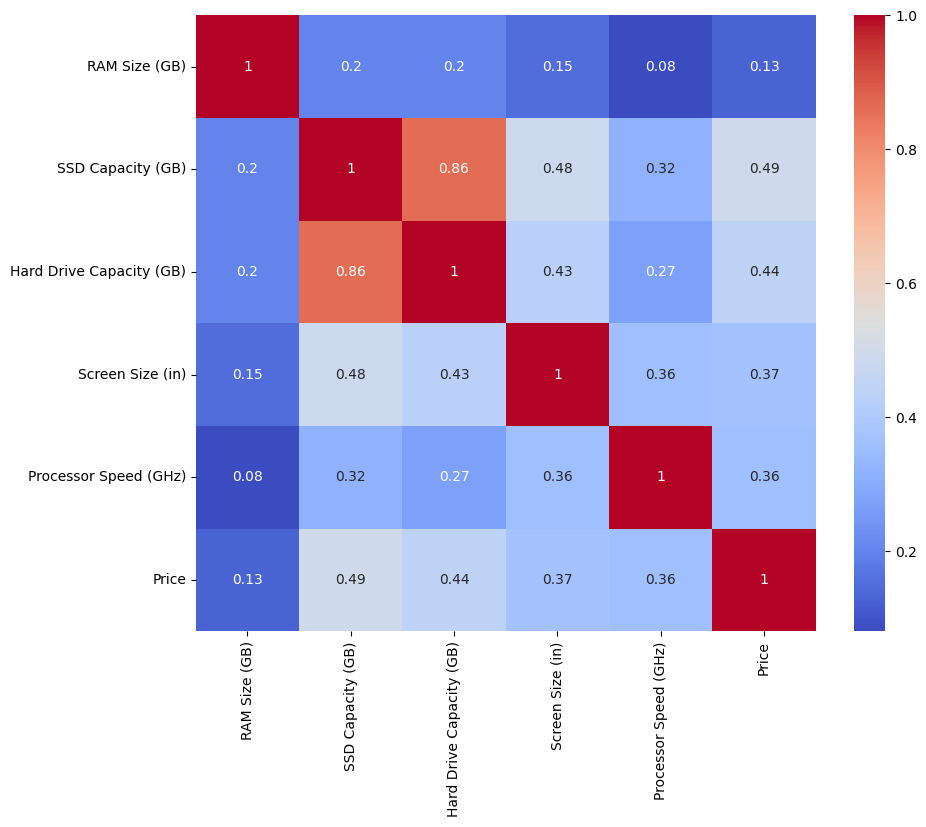

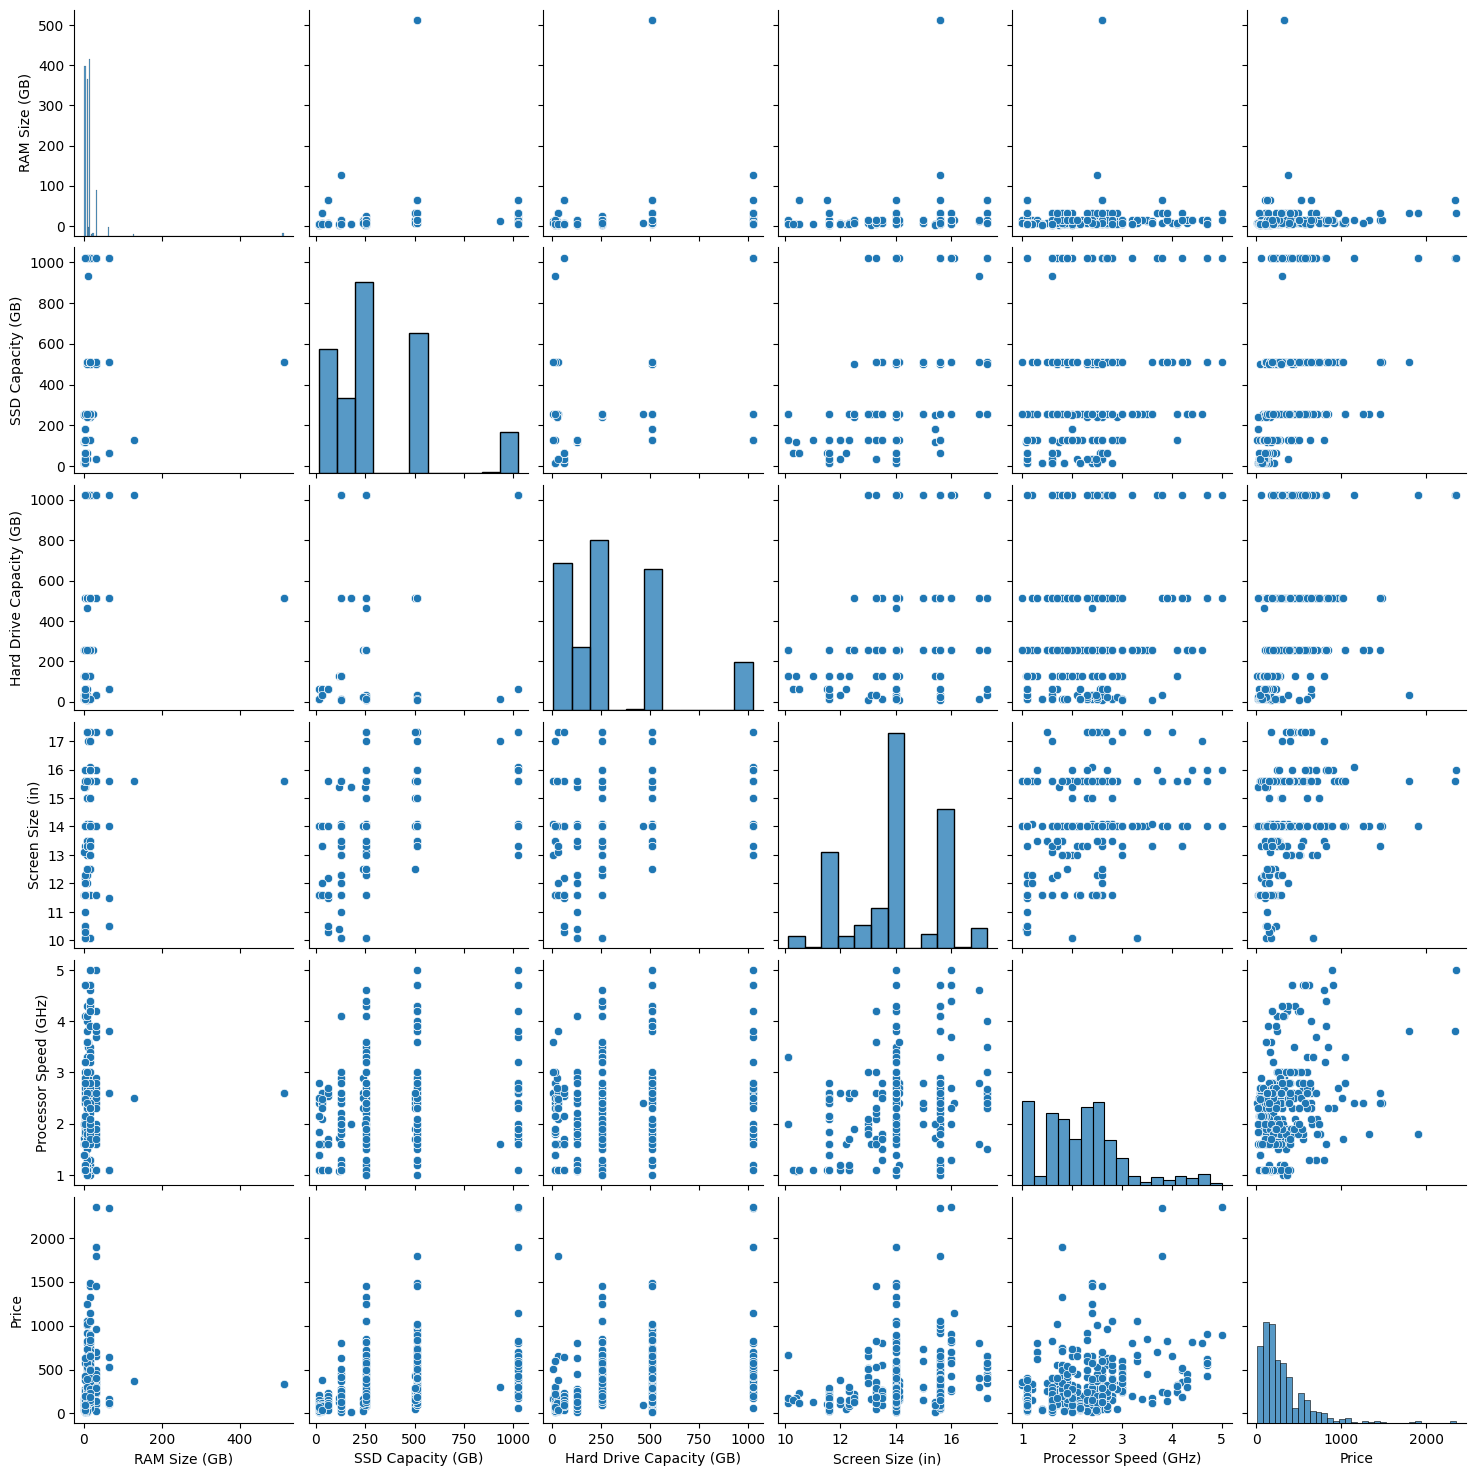

In [1066]:
# Compute correlations
cormat = ebay_regression.corr()

# Round correlation matrix to 2 decimal places
cormat = cormat.round(2)

# Plot correlation matrix using a heatmap
plt.figure(figsize = (10,8))
sns.heatmap(cormat,annot=True, cmap = 'coolwarm')
plt.show()

# Create scatterplot matrix
sns.pairplot(ebay_regression.iloc[:,:12])
plt.show()

In [1067]:
ebay_data_cleaned

,Item Number,Brand,Processor,GPU,Type,Maximum Resolution,Model,OS,Storage Type,Features,Price,SSD Capacity (GB),RAM Size (GB),Hard Drive Capacity (GB),Screen Size (in),Processor Speed (GHz)
2,85264981003,Dell,Intel Core i5-6300U,Intel HD Graphics,Notebook/Laptop,1920 x 1080,Dell Latitude E5470,Windows 10 Pro,SSD,"10/100 LAN Card, Backlit Keyboard, Bluetooth, ...",175.00,500.0,16.0,512.0,14.0,2.4
12,85264981014,CHUWI,Intel Celeron Processor N4100,"Intel UHD Graphics 600, 650MHz",Notebook/Laptop,1920 x 1080,CHUWI Lapbook Pro,Windows 11 Home,SSD,Wi-Fi,151.99,256.0,8.0,256.0,14.1,2.8
13,85264981015,CHUWI,Intel Core i5-8259U,Intel Iris Plus Graphics 655,Notebook/Laptop,2160 x 1440,CHUWI CoreBook X,Windows 10,HDD,"Backlit Keyboard, Bluetooth, Built-in Micropho...",243.99,512.0,8.0,512.0,14.0,3.8
16,85264981018,Dell,Intel Celeron,Intel UHD Graphics 600,Notebook/Laptop,1366 x 768,Dell Latitude 3189,Windows 10 Pro,SSD,"Bluetooth, Built-in Microphone, Built-in Webca...",129.99,128.0,4.0,128.0,11.0,1.1
17,85264981019,Acer,Intel Celeron N,Intel HD Graphics,Notebook/Laptop,1366 x 768,Acer Chromebook C731,Chrome OS,SSD,"Bluetooth, Built-in Microphone, Built-in Web...",39.99,16.0,4.0,16.0,11.6,1.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3240,85264987132,Microsoft,Intel Core i7,Integrated Intel UHD Graphics,Notebook/Laptop,1920 x 1080,Microsoft Surface Laptop,Not Included,SSD,"Bluetooth, Built-in Microphone, Built-in Webca...",188.00,512.0,16.0,512.0,13.3,4.2
3244,85264987136,Lenovo,AMD Ryzen 5,AMD Radeon Graphics,Notebook/Laptop,1920 x 1080,Lenovo ThinkPad T14,Windows 10 Pro,SSD,"Built-in Webcam, Wi-Fi",499.99,256.0,16.0,256.0,14.0,2.3
3269,85264987184,HP,Intel Core i5 11th Gen.,Intel Iris Xe Graphics,Notebook/Laptop,1920 x 1080,15-dy2795wm,‎Windows 11 Home,SSD,"Bluetooth, Built-in Webcam, Built-in Microphone",389.95,256.0,8.0,256.0,15.6,2.4
3339,85264987452,ASUS,Intel Celeron N,Intel UHD Graphics 600,Notebook/Laptop,1366 x 768,ASUS E210,Windows 11 Home,eMMC,Bluetooth,101.36,64.0,4.0,64.0,11.6,1.1


### Running Regression with Categorical variables

In [1068]:
# Keep only the specified columns
columns_to_keep = [ 'Brand','Type','Storage Type','RAM Size (GB)', 'SSD Capacity (GB)', 'Hard Drive Capacity (GB)', 'Screen Size (in)','Processor Speed (GHz)','Price']
ebay_regression = ebay_data_cleaned[columns_to_keep]


In [1069]:
ebay_regression.to_csv('ebay_regression.csv', index=False)

In [1070]:
ebay_regression

,Brand,Type,Storage Type,RAM Size (GB),SSD Capacity (GB),Hard Drive Capacity (GB),Screen Size (in),Processor Speed (GHz),Price
2,Dell,Notebook/Laptop,SSD,16.0,500.0,512.0,14.0,2.4,175.00
12,CHUWI,Notebook/Laptop,SSD,8.0,256.0,256.0,14.1,2.8,151.99
13,CHUWI,Notebook/Laptop,HDD,8.0,512.0,512.0,14.0,3.8,243.99
16,Dell,Notebook/Laptop,SSD,4.0,128.0,128.0,11.0,1.1,129.99
17,Acer,Notebook/Laptop,SSD,4.0,16.0,16.0,11.6,1.6,39.99
...,...,...,...,...,...,...,...,...,...
3240,Microsoft,Notebook/Laptop,SSD,16.0,512.0,512.0,13.3,4.2,188.00
3244,Lenovo,Notebook/Laptop,SSD,16.0,256.0,256.0,14.0,2.3,499.99
3269,HP,Notebook/Laptop,SSD,8.0,256.0,256.0,15.6,2.4,389.95
3339,ASUS,Notebook/Laptop,eMMC,4.0,64.0,64.0,11.6,1.1,101.36


In [1071]:
# Check the data types of the columns in the new dataset
ebay_regression.dtypes


Brand                        object
Type                         object
Storage Type                 object
RAM Size (GB)               float64
SSD Capacity (GB)           float64
Hard Drive Capacity (GB)    float64
Screen Size (in)            float64
Processor Speed (GHz)       float64
Price                       float64
dtype: object

In [1072]:
import numpy as np
import statsmodels.api as sm

# Prepare the regression model
X_new = ebay_regression.drop(columns=['Price','Brand','Type','Storage Type','RAM Size (GB)','Hard Drive Capacity (GB)'])
X_new = sm.add_constant(X_new)
y_new = ebay_regression['Price']

# Apply log transformation to the dependent variable
logy_new = np.log(y_new)

# Fit the model
logreg2_new = sm.OLS(logy_new, X_new).fit()

# Display the regression summary
logreg2_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.422
Method:                 Least Squares   F-statistic:                     129.2
Date:                Tue, 26 Nov 2024   Prob (F-statistic):           1.23e-62
Time:                        09:56:23   Log-Likelihood:                -543.49
No. Observations:                 527   AIC:                             1095.
Df Residuals:                     523   BIC:                             1112.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     2.4634      0.284      8.684      0.000       1.906       3.021
SSD Capacity (GB)         0.0014      0.000     10.486      0.000       0.001       0.002
Screen Size (in)          0.1532      0.022      6.914      0.000       0.110       0.197
Processor Speed (GHz)     0.1570      0.039      4.042      0.000       0.081       0.233
==============================================================================
Omnibus:                       14.465   Durbin-Watson:                   2.072
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               26.508
Skew:                          -0.129   Prob(JB):                     1.75e-06
Kurtosis:                       4.068   Cond. No.                     3.90e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

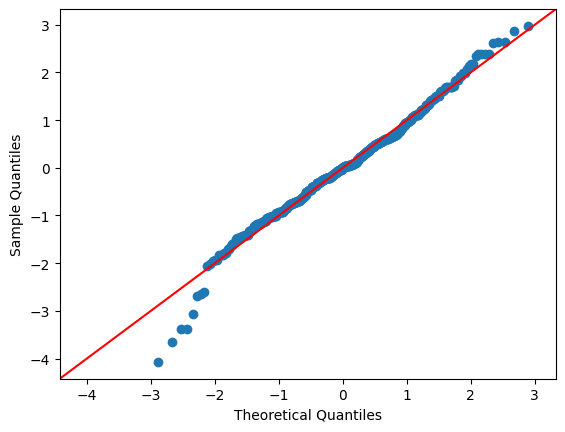

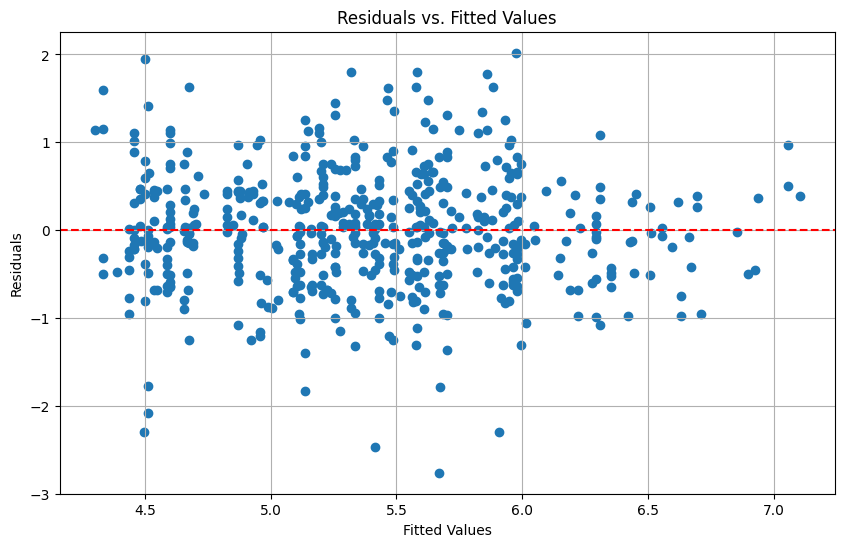

In [1073]:
# Calculate residuals
residuals = logreg2_new.resid

# Generate Q-Q Plot
fig = sm.qqplot(residuals, fit=True, line='45')
plt.show()


# Residuals vs. Fitted
plt.figure(figsize=(10, 6))
plt.scatter(logreg2_new.fittedvalues, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.grid(True)
plt.show()